# All about the useful function in nn.functional

## https://pytorch.org/docs/stable/generated/torch.nn.functional.cosine_similarity.html

In [1]:
import numpy as np
import torch
import torch.nn as nn
from torch.nn import functional as F

## nn.functional.pad

In [3]:
data_a = torch.rand(3, 5)
print(data_a, data_a.shape)
data_a_pad = F.pad(data_a, (0, 0, 2, 3)) ## padding the tensor in a inverse order dimensions
print(data_a_pad, data_a_pad.shape)

model_output = torch.randn(1, 3, 5)
print(model_output, model_output.shape)
model_output = F.pad(model_output, (0, 0, 0, 1), mode="replicate")
print(model_output, model_output.shape)

tensor([[0.9854, 0.8047, 0.2832, 0.1536, 0.6510],
        [0.4748, 0.3009, 0.1775, 0.6845, 0.9589],
        [0.3919, 0.8940, 0.1519, 0.4315, 0.9764]]) torch.Size([3, 5])
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.9854, 0.8047, 0.2832, 0.1536, 0.6510],
        [0.4748, 0.3009, 0.1775, 0.6845, 0.9589],
        [0.3919, 0.8940, 0.1519, 0.4315, 0.9764],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000]]) torch.Size([8, 5])
tensor([[[-1.8260,  0.6726, -0.0034,  0.5011, -0.1727],
         [ 1.0194, -0.1509, -0.7842,  0.1076, -1.0302],
         [-0.5689,  0.2523, -1.7349,  0.6499, -1.3174]]]) torch.Size([1, 3, 5])
tensor([[[-1.8260,  0.6726, -0.0034,  0.5011, -0.1727],
         [ 1.0194, -0.1509, -0.7842,  0.1076, -1.0302],
         [-0.5689,  0.2523, -1.7349,  0.6499, -1.3174],
         [-0.5689,  0.2523, -1.7349,  0.6499, -1.3

## nn.functional.pairwise_distance

## F.one_hot
https://pytorch.org/docs/stable/generated/torch.nn.functional.one_hot.html

In [13]:
input = torch.arange(0, 5) % 3
print(input.shape, input.dtype)
print(input)

input_one_hot = F.one_hot(input)
print(input_one_hot, input_one_hot.shape, input_one_hot.dtype)

input_one_hot = F.one_hot(input, 6) # specify the number of classes manually
print(input_one_hot, input_one_hot.shape)

input = torch.arange(0, 6).view(3,2) % 3
print(input, input.shape)

input_one_hot = F.one_hot(input)
print(input_one_hot, input_one_hot.shape)
print(input_one_hot.sum(0))

torch.Size([5]) torch.int64
tensor([0, 1, 2, 0, 1])
tensor([[1, 0, 0],
        [0, 1, 0],
        [0, 0, 1],
        [1, 0, 0],
        [0, 1, 0]]) torch.Size([5, 3]) torch.int64
tensor([[1, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0],
        [1, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0]]) torch.Size([5, 6])
tensor([[0, 1],
        [2, 0],
        [1, 2]]) torch.Size([3, 2])
tensor([[[1, 0, 0],
         [0, 1, 0]],

        [[0, 0, 1],
         [1, 0, 0]],

        [[0, 1, 0],
         [0, 0, 1]]]) torch.Size([3, 2, 3])
tensor([[1, 1, 1],
        [1, 1, 1]])


## nn.softmax
https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html

In [5]:
x = torch.rand((5, 2))
print(x, x.shape)

score = F.softmax(x, dim=-1)
print(score, score.shape)

## Softmax is invariant to translation operation
x -= 10.0
print(x, x.shape)
score = F.softmax(x, dim=-1)
print(score, score.shape)

predLabel = torch.round(F.softmax(x, dim = -1))[:,1]
print(predLabel)

tensor([[0.5807, 0.0593],
        [0.2386, 0.9519],
        [0.0948, 0.1985],
        [0.9567, 0.4438],
        [0.0408, 0.3318]]) torch.Size([5, 2])
tensor([[0.6275, 0.3725],
        [0.3289, 0.6711],
        [0.4741, 0.5259],
        [0.6255, 0.3745],
        [0.4278, 0.5722]]) torch.Size([5, 2])
tensor([[-9.4193, -9.9407],
        [-9.7614, -9.0481],
        [-9.9052, -9.8015],
        [-9.0433, -9.5562],
        [-9.9592, -9.6682]]) torch.Size([5, 2])
tensor([[0.6275, 0.3725],
        [0.3289, 0.6711],
        [0.4741, 0.5259],
        [0.6255, 0.3745],
        [0.4278, 0.5722]]) torch.Size([5, 2])
tensor([0., 1., 1., 0., 1.])


## nn.functional.normalize

In [23]:
audio_embedding = torch.rand((64, 512))
audio_embedding = F.normalize(audio_embedding, p=2, dim=1)
print(audio_embedding.shape)

dummy_array = np.array([[1,2,3], [2,3,4], [5,6,7], [5,5,5]], dtype=np.float)
audio_embedding = torch.from_numpy(dummy_array)
audio_embedding = F.normalize(audio_embedding, p=2, dim=1)
print(audio_embedding.shape)
print(audio_embedding)

torch.Size([64, 512])
torch.Size([4, 3])
tensor([[0.2673, 0.5345, 0.8018],
        [0.3714, 0.5571, 0.7428],
        [0.4767, 0.5721, 0.6674],
        [0.5774, 0.5774, 0.5774]], dtype=torch.float64)


## nn.functional.cosine_similarity

In [18]:
def get_consine_distance(a, b):
    d = nn.functional.cosine_similarity(a, b, dim=2)
    return d


a, v = torch.rand((2, 3, 4)), torch.randn((2, 3, 4))
a = F.normalize(a, p=2, dim=-1)
v = F.normalize(v, p=2, dim=-1)

print(a)
print(v)
d = get_consine_distance(a, v)
print(d, d.shape)

cosine_loss = 1 - d
print(cosine_loss, cosine_loss.shape)

cosine_loss = torch.mean(cosine_loss)
print(cosine_loss)
# pred_label = d > 0.75
# print(pred_label)



# y = torch.zeros((5, 1)).int()
# print(y.shape, y.dtype)

# pred_label = pred_label.int()
# correctNum = (pred_label == y).sum().float()
# print(correctNum)

tensor([[[0.6454, 0.5909, 0.4722, 0.1065],
         [0.5794, 0.3993, 0.6225, 0.3426],
         [0.4970, 0.3184, 0.5451, 0.5953]],

        [[0.3604, 0.5549, 0.4772, 0.5784],
         [0.6344, 0.7549, 0.1376, 0.0938],
         [0.4643, 0.5334, 0.6254, 0.3299]]])
tensor([[[-0.7632, -0.6214,  0.1208, -0.1296],
         [-0.1561, -0.8057, -0.4705, -0.3242],
         [-0.7320, -0.6694, -0.0977, -0.0805]],

        [[ 0.3285,  0.8725, -0.0617,  0.3563],
         [ 0.1925, -0.3026, -0.4393, -0.8237],
         [ 0.3735, -0.7660, -0.3534,  0.3858]]])
tensor([[-0.8165, -0.8161, -0.6781],
        [ 0.7792, -0.2440, -0.3289]]) torch.Size([2, 3])
tensor([[1.8165, 1.8161, 1.6781],
        [0.2208, 1.2440, 1.3289]]) torch.Size([2, 3])
tensor(1.3508)


In [14]:
a = [0.6270, 0.0501, 0.3424, 0.6979]
b = [-0.1985, -0.3189,  0.7742,  0.5094]

c = 0
for val1, val2 in zip(a, b):
    c += val1 * val2
print(c)

0.48015995


In [9]:
y = torch.zeros(64, 1).float()

print(y.shape, y.dtype, y.ndim)

torch.Size([64, 1]) torch.float32 2


In [7]:
a = torch.rand((1, 64, 1))
b = a * 1.8

dist = get_consine_distance(a, b)
print(dist)

torch.Size([1, 1])
tensor([[1.0000]])


## interpolate

torch.Size([1, 3, 160, 160])
torch.Size([1, 3, 224, 224])
(1, 224, 224, 3)
(224, 224, 3)


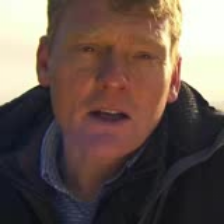

In [18]:
import cv2
from PIL import Image
from IPython.display import display


img_path = "/data/zhanghm/LRS2/5968070088624821576/00025/000000.jpg"
img_src = cv2.imread(img_path)

img_src = img_src.transpose(2,0,1) / 255.0
x = torch.from_numpy(img_src[np.newaxis,...])
print(x.shape)
out = F.interpolate(x, size=(224, 224), mode='bilinear', align_corners=False)
print(out.shape)

pred = out.numpy().transpose(0, 2, 3, 1) * 255.
print(pred.shape)

img = pred[0].astype(np.uint8)
print(img.shape)

display(Image.fromarray(img[..., ::-1]))

## AffineGrid and grid_sample